In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def TDMASolve(a, b, c, d):
  nmax = len(d)#n em números é linhas

  # Modifica o primeiro coeficiente de cada linha
  c[0] /= b[0] #Risco de divisão por zero.
  d[0] /= b[0]

  for i in range(1, nmax):
    ptemp = b[i] - (a[i] * c[i-1])
    c[i] /= ptemp
    d[i] = (d[i] - a[i] * d[i-1])/ptemp

  #Substituição de volta
  x = [0 for i in range(nmax)]
  x[-1] = d[-1]
  for i in range(-2,-nmax-1,-1):
    x[i] = d[i] - c[i] * x[i+1]
  return x

#Questão 1: Lei de Helmholtz - Condição Dirichlet

In [ ]:

def taxaconvergencia(erro, numpoints):
  taxa = []
  for i in range(0, len(numpoints)-1):
      taxa.append((np.log2(erro[i+1]) - np.log2(erro[i])) / (np.log2(numpoints[i+1]) - np.log2(numpoints[i])))
  return np.mean(taxa)

def sol_exata(x):
  return np.cos(k*x)

def f(k, x):
  return 0.0

def norma_maximo(aprox, exata):
  return max(abs(exata - aprox))

def diferenca_central_dirichlet(a, b, k, nel):
  h = (b-a)/nel
  x = np.linspace(a, b, nel+1)
  #print(h*k)
  u = np.zeros(nel + 1)

  u[0]= sol_exata(a)
  u[nel] = sol_exata(b)

  diagonal1 = np.ones(nel-1 )
  diagonal2 = np.ones(nel-1)*(((h**2)*(k**2))-2)
  diagonal3 = np.ones(nel-1)
  d = np.zeros(nel-1)
  #d = f(k, np.linspace(a + h, b-h, nel-1))

  d[0] = d[0] - (u[0])
  d[nel-2] = d[nel-2] - u[nel]

  u[1:nel] = TDMASolve(diagonal1, diagonal2, diagonal3, d)
  return u, x


for i in range(1, 4):
  k = 10**i
  erros = []
  nels = []
  for j in range(1, 6):
    nel = int(10 ** j) #numero de elementos da aproximação
    a = 0
    b = 1
    u, x = diferenca_central_dirichlet(a, b, k, nel)
    #print(nel)
    #print(k)
    #print(norma_maximo(u,sol_exata(x )))
    if(k < nel):
        erros.append(norma_maximo(u, sol_exata(x)))
        nels.append( nel)

    """ plt.plot(np.linspace(a, b, 100000), sol_exata(np.linspace(a, b, 100000)), color="orange")
    plt.plot(x, u, '-*', color='blue')
    plt.show() """

  print(taxaconvergencia(erros,nels))
  plt.plot(np.log10(nels), np.log10(erros), '-*', label = "k=" + "%.0f" % k)
  plt.legend()

plt.xlabel("log₁₀(número de pontos)")
plt.ylabel("log₁₀(erro)")
plt.show()

#Questão 2: Condição de Neumann

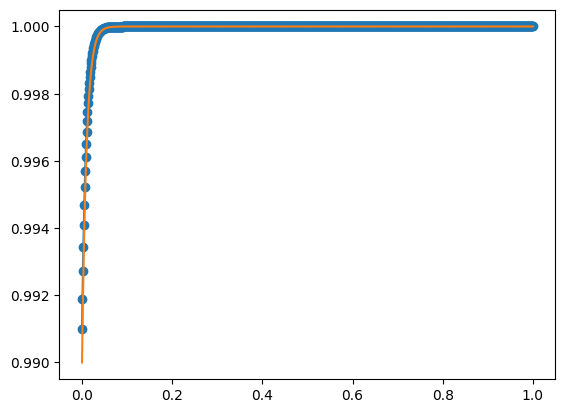

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

def devsol_exata(x):
  return np.exp(-100*x)

def sol_exata2(x, e, k ):
  return ((-e/k)*np.exp((-k/e)*x)) + 1 + (e/k)*np.exp(-k/e)

def f2():
  return 0.0

In [167]:
def Neumann_progressivo(xi, xf, nel, k, e):
    h = (xf - xi) / nel
    h2 = h * h
    x = np.linspace(xi, xf, nel)
    u = np.zeros(nel)
    alpha = 1 #valor cujo a derivada é igual
    beta = 1
    u[nel-1] = beta

    # Construção da matriz
    c = np.ones(nel) * (e/h2) #diagonal uj+1
    b = np.ones(nel) * ((-2*e + k*h)/h2) #diagonal principal
    a = np.ones(nel) * ((e/h2)-k/h) #diagonal uj-1
    # Construção do vetor fonte
    d = np.zeros(nel)
    # Contribuição das condições de contorno no termo fonte
    d[0] = d[0] - k*alpha +(e*alpha)/h
    d[nel-1] = d[nel-1] - e*beta/h2

    # Modificação do primeiro elemento da matriz para inclusão da condição Neumann
    a[0] = e/h2
    b[0] = -e/h2

    u[0:nel] = TDMASolve(a, b, c, d)
    return u, x

In [170]:
def Neumann_regressivo(xi, xf, nel, k, e):
    h = (xf - xi) / nel
    h2 = h * h
    x = np.linspace(xi, xf, nel)
    u = np.zeros(nel)
    alpha = 1 #valor cujo a derivada é igual
    beta = 1
    u[nel-1] = beta

    # Construção da matriz
    c = np.ones(nel) * (e/h2) + k/h #diagonal uj+1
    b = np.ones(nel) * ((-2*e - k*h)/h2) #diagonal principal
    a = np.ones(nel) * ((e/h2)) #diagonal uj-1
    # Construção do vetor fonte
    d = np.zeros(nel)
    # Contribuição das condições de contorno no termo fonte
    d[0] = d[0] + (e*alpha)/h
    d[nel-1] = d[nel-1] - e*beta/h2 - k*beta/h

    # Modificação do primeiro elemento da matriz para inclusão da condição Neumann
    a[0] = e/h2 + k/h
    b[0] = -e/h2 -k/h

    u[0:nel] = TDMASolve(a, b, c, d)
    return u, x

In [171]:
def Neumann_difcentral(xi, xf, nel, k, e):
    h = (xf - xi) / nel
    h2 = h * h
    x = np.linspace(xi, xf, nel)
    u = np.zeros(nel)
    alpha = 1 #valor cujo a derivada é igual
    beta = 1
    u[nel-1] = beta

    # Construção da matriz
    c = np.ones(nel) * (e/h2) + k/(2*h) #diagonal uj+1
    b = np.ones(nel) * (-2*e/h2) #diagonal principal
    a = np.ones(nel) * ((e/h2) - k/(2*h)) #diagonal uj-1
    # Construção do vetor fonte
    d = np.zeros(nel)
    # Contribuição das condições de contorno no termo fonte
    d[0] = d[0] + ((2*e*alpha)/h) - (k*alpha)
    d[nel-1] = d[nel-1] - e*beta/h2 - k*beta/(2*h)

    # Modificação do primeiro elemento da matriz para inclusão da condição Neumann
    b[0] = -2*e/h2
    c[0] = 2*e/h2

    u[0:nel] = TDMASolve(a, b, c, d)
    return u, x

In [172]:
def calculagama(e, k, h, xi, xf):
  peh = (abs(k)*h)/e
  return (1/peh) + (np.exp(-peh) + 1)/(2*(np.exp(-peh)-1))
def Neumann_difcentral_artificial(xi, xf, nel, k, e):
    h = (xf - xi) / nel
    h2 = h * h
    x = np.linspace(xi, xf, nel)
    u = np.zeros(nel)
    alpha = 1 #valor cujo a derivada é igual
    beta = 1
    u[nel-1] = beta
    peh = k*(xf - xi)/e
    gama = calculagama(-e, k, h, xi,xf)
    e = e + gama*k*h
    # Construção da matriz
    c = np.ones(nel) * (e/h2) + k/(2*h) #diagonal uj+1
    b = np.ones(nel) * (-2*e/h2) #diagonal principal
    a = np.ones(nel) * ((e/h2) - k/(2*h)) #diagonal uj-1
    # Construção do vetor fonte
    d = np.zeros(nel)
    # Contribuição das condições de contorno no termo fonte
    d[0] = d[0] + ((2*e*alpha)/h) - (k*alpha)
    d[nel-1] = d[nel-1] - e*beta/h2 - k*beta/(2*h)

    # Modificação do primeiro elemento da matriz para inclusão da condição Neumann
    b[0] = -2*e/h2
    c[0] = 2*e/h2

    u[0:nel] = TDMASolve(a, b, c, d)
    return u, x

In [ ]:
#u1, x = Neumann_regressivo(0,1,200, 1, 0.01)
#u2, x = Neumann_progressivo(0,1,200,1,0.01)
#u3,x = Neumann_difcentral(0,1,100,1,0.01)
#u4, x = Neumann_difcentral_artificial(0,1,100,1,0.01)
#plt.plot(x, u1, '-o')
#plt.plot(x, u2, '-o')
#plt.plot(x, u4, '-o')

erros =[]
nels =[]
for i in range(2,7):
  nel = 10**i
  u,x = Neumann_progressivo(0,1,nel, 1,  0.01)
  nels.append(nel)
  erros.append(norma_maximo(u, sol_exata2(x, 0.01, 1)))
  print(nel)
  print(1/nel)
  ''' plt.plot(x, u, '-o', label = "diferença progressiva")
  plt.plot(np.linspace(0, 1, 1000), sol_exata2(np.linspace(0, 1, 1000), 0.01, 1), color="red", label="solução exata")
  plt.legend()
  plt.show() '''

plt.plot( np.log10(nels),np.log10(erros),'-o', label="diferença progressiva")
print("Neumann progressivo "+ "%1.f" % taxaconvergencia(erros,nels))

erros =[]
nels =[]
for i in range(2,7):
  nel = 10**i
  u,x = Neumann_regressivo(0,1,nel, 1,  0.01)
  nels.append(nel)
  erros.append(norma_maximo(u, sol_exata2(x, 0.01, 1)))
  print(nel)
  print(1/nel)
  ''' plt.plot(x, u, '-o', label = "diferença progressiva")
  plt.plot(np.linspace(0, 1, 1000), sol_exata2(np.linspace(0, 1, 1000), 0.01, 1), color="red", label="solução exata")
  plt.legend()
  plt.show() '''

plt.plot( np.log10(nels),np.log10(erros),'-o', label="diferença regressiva")
print("Neumann regressivo "+ "%1.f" % taxaconvergencia(erros,nels))

erros =[]
nels =[]
for i in range(2,7):
  nel = 10**i
  u,x = Neumann_difcentral(0,1,nel, 1,  0.01)
  nels.append(nel)
  erros.append(norma_maximo(u, sol_exata2(x, 0.01, 1)))
  print(nel)
  print(1/nel)
  ''' plt.plot(x, u, '-o', label = "diferença progressiva")
  plt.plot(np.linspace(0, 1, 1000), sol_exata2(np.linspace(0, 1, 1000), 0.01, 1), color="red", label="solução exata")
  plt.legend()
  plt.show() '''

plt.plot( np.log10(nels),np.log10(erros),'-o', label="diferença central")
plt.legend()
print("Neumann central "+ "%.2f" % taxaconvergencia(erros,nels))

#plt.plot(x, u3, '-o')
plt.xlabel("log₁₀(número de pontos)")
plt.ylabel("log₁₀(erro)")
plt.show()

In [ ]:
for i in range(1, 7):
  nel = 10*i
  u3,x = Neumann_difcentral(0,1,nel,1,0.01)
  u4, x = Neumann_difcentral_artificial(0,1,nel,1,0.01)
  print(nel)
  print(1/nel)
  plt.plot(x, u3,'-o', label="Não estabilizada")
  plt.plot(x, u4,'-o', label="Estabilizada")
  plt.plot(np.linspace(0, 1, 1000), sol_exata2(np.linspace(0, 1, 1000), 0.01, 1), color="red", label="Solução exata")
  plt.legend()
  plt.show()

In [ ]:
for i in range(1, 7):
  nel = 10*i
  u3,x = Neumann_difcentral(0,1,nel,1,0.01)
  u4, x = Neumann_difcentral_artificial(0,1,nel,1,0.01)
  print(nel)
  print(1/nel)

  plt.plot(x, abs(u4-sol_exata2(x, 0.01, 1)), label="Estabilizada")
  print(abs(u4-sol_exata2(x, 0.01, 1)))
  plt.show()